In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('mushrooms.csv')

ЭТАП 1: EDA и Исследование данных

#1.df.head(), df.info(), df.shape, df.columns

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.shape

(8124, 23)

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
#2..nunique() для всех признаков
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [13]:
#3.Проверить баланс классов: df['class'].value_counts(normalize=True)
df['class'].value_counts(normalize=True)

,proportion
class,
e,0.517971
p,0.482029


In [14]:
#4..isnull().sum() и поиск пропусков (?)
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [15]:
#5.Частота по признаку odor, cap-color, habitat
df['odor'].value_counts()

,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


In [16]:
df.value_counts('cap-color')

,count
cap-color,
n,2284
g,1840
e,1500
y,1072
w,1040
b,168
p,144
c,44
u,16


In [17]:
df.value_counts('habitat')

,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


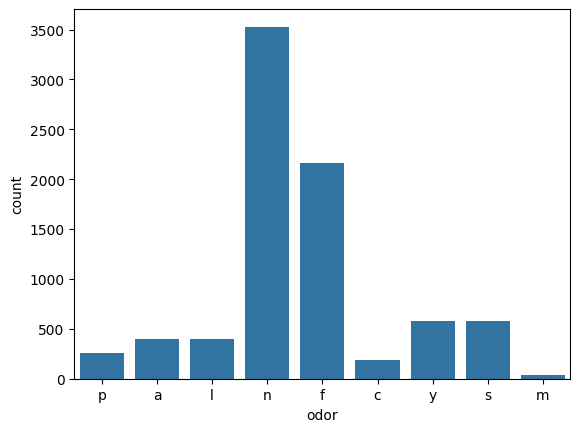

In [19]:
#sns.countplot()
sns.countplot(data=df, x='odor')
plt.show()

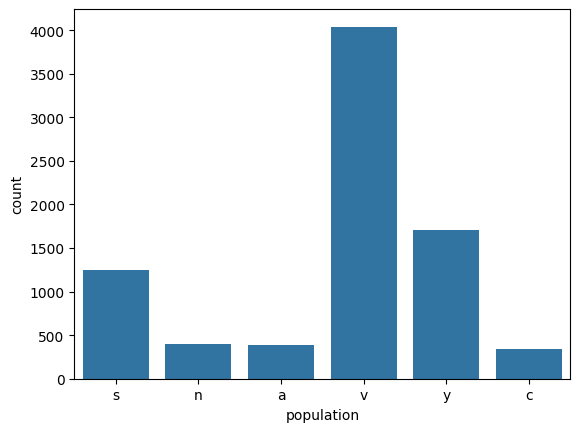

In [20]:
sns.countplot(data=df, x='population')
plt.show()

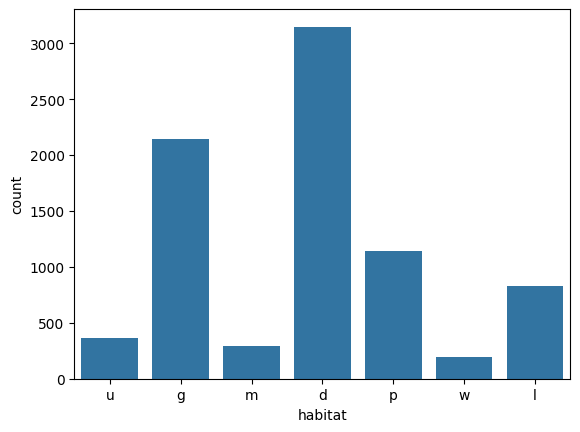

In [21]:
sns.countplot(data=df, x='habitat')
plt.show()

In [23]:
df['stalk-root'].value_counts(normalize=True)

,proportion
stalk-root,
b,0.464796
?,0.305268
e,0.137863
c,0.068439
r,0.023634


In [29]:
import numpy as np

df = df.replace('?', np.nan)
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [27]:
df['stalk-root'] = df['stalk-root'].fillna(df['stalk-root'].mode()[0])

In [28]:
df['stalk-root'].value_counts()

,count
stalk-root,
b,6256
e,1120
c,556
r,192


In [31]:
data = df

In [32]:
df = pd.get_dummies(df.drop(columns='class'), drop_first=True, dtype=int)

In [35]:
df = data

In [40]:
classdf = df['class']

In [42]:
classdf.value_counts()

,count
class,
e,4208
p,3916


In [43]:
df = pd.get_dummies(df.drop(columns='class'), drop_first=True, dtype=int)

In [44]:
df['class'] = classdf

In [46]:
df['class'] = df['class'].map({'e': 0, 'p': 1})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 95 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 8124 non-null   int64
 1   cap-shape_f                 8124 non-null   int64
 2   cap-shape_k                 8124 non-null   int64
 3   cap-shape_s                 8124 non-null   int64
 4   cap-shape_x                 8124 non-null   int64
 5   cap-surface_g               8124 non-null   int64
 6   cap-surface_s               8124 non-null   int64
 7   cap-surface_y               8124 non-null   int64
 8   cap-color_c                 8124 non-null   int64
 9   cap-color_e                 8124 non-null   int64
 10  cap-color_g                 8124 non-null   int64
 11  cap-color_n                 8124 non-null   int64
 12  cap-color_p                 8124 non-null   int64
 13  cap-color_r                 8124 non-null   int64
 14  cap-colo

In [48]:
df_test = df

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test.drop(columns='class'))

In [50]:
x = scaled_data
y = df_test['class']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
logistic_model = LogisticRegression()

In [54]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [55]:
y_pred_log = logistic_model.predict(x_test)

In [56]:
accuracy_score(y_pred_log, y_test)

1.0

In [57]:
x = df.drop(columns='class')
y = df['class']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
random_model = RandomForestClassifier()


In [60]:
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
y_random_pred = random_model.predict(x_test)

In [62]:
accuracy_score(y_random_pred, y_test)

1.0

In [63]:
tree_model = DecisionTreeClassifier()


In [64]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_tree_pred = tree_model.predict(x_test)

In [67]:
accuracy_score(y_test, y_tree_pred)

1.0

In [68]:
from sklearn.metrics import f1_score

f1_score(y_test, y_tree_pred)

1.0

In [70]:
import joblib

joblib.dump(tree_model, 'tree_model.pkl')
joblib.dump(random_model, 'random_model.pkl')

['random_model.pkl']

In [71]:
df.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_c', 'stalk-root_e',
       'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-col

In [72]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')